In [1]:
import cv2
import numpy as np
from PIL import Image
import queue
import matplotlib.pyplot as plt
from heapq import heappop, heappush
import math

In [12]:
class Vertex:
    def __init__(self, x_coordinate, y_coordinate, fscore = float('inf'), gscore = float('inf')):
        self.x = x_coordinate
        self.y = y_coordinate
        self.xParent = None
        self.yParent = None
        self.processed = False
        self.fscore = fscore
        self.gscore = gscore
        self.closed = False
        self.out_openset = True
        #self.queueIndex = None
        self.condition = None
        
    def __lt__(self, b):
        return self.fscore < b.fscore

In [16]:
def heuristic(current_vertex, end_vertex):
    return abs(current_vertex.x - end_vertex.x) + abs(current_vertex.y - end_vertex.y)

In [8]:
from heapq import heappush, heappop, heapify

In [11]:
def get_neighbors(mat, r, c):
    shape=mat.shape
    neighbors=[]
    #ensure neighbors are within image boundaries
    if r > 0 and not mat[r-1][c].processed and not mat[r-1][c].condition ==0:
        neighbors.append(mat[r-1][c])
    if r < shape[0] - 1 and not mat[r+1][c].processed and not mat[r+1][c].condition ==0:
        neighbors.append(mat[r+1][c])
    if c > 0 and not mat[r][c-1].processed and not mat[r][c-1].condition ==0:
        neighbors.append(mat[r][c-1])
    if c < shape[1] - 1 and not mat[r][c+1].processed and not mat[r][c+1].condition == 0:
        neighbors.append(mat[r][c+1])
    return neighbors

In [28]:
def find_shortest_path_astar(matrix, x_start, y_start, x_end, y_end):
    lenrows, lencols = matrix.shape
    print('rows', lenrows)
    print('cols', lencols)
    vectorMatrix = np.full((lenrows, lencols), None)
    for r in range(lenrows):
        for c in range(lencols):
            #print(matrix[0][0])
            vectorMatrix[r][c] = Vertex(c, r)
            vectorMatrix[r][c].condition = matrix[r][c]
    #vectorMatrix[y_start][x_start].condition = -1
    vectorMatrix[y_end][x_end].condition = -2
    start_vertex = vectorMatrix[y_start][x_start]
    start_vertex.gscore = 0
    end_vertex = vectorMatrix[y_end][x_end]
    start_vertex.fscore = heuristic(start_vertex, end_vertex)
    openSet = []
    heappush(openSet, start_vertex)
    while openSet:
        current = heappop(openSet)
        if current.condition == -2:
            print('found')
            path = []
            iter_v = current
            path.append((x_end, y_end))
            while(iter_v.y != y_start or iter_v.x != x_start):
                    path.append((iter_v.x,iter_v.y))
                    #print(iter_v.xParent)
                    #print(iter_v.yParent)
                    iter_v = vectorMatrix[iter_v.yParent][iter_v.xParent]
                    #print('itertype2')
                    #print(type(iter_v))
                    #print('test2')
            return path
        current.out_openset = True
        current.closed = False
        for neighbor in get_neighbors(vectorMatrix, current.y, current.x):
            if neighbor.closed:
                continue
            tentative_gscore = current.gscore + 1
            if tentative_gscore >= neighbor.gscore:
                continue
            neighbor.xParent = current.x
            neighbor.yParent = current.y
            neighbor.gscore = tentative_gscore
            neighbor.fscore = neighbor.gscore + heuristic(neighbor, end_vertex)
            if neighbor.out_openset:
                neighbor.out_openset = False
                heappush(openSet, neighbor)
            else:
                openSet.remove(neighbor)
                heappush(openSet, neighbor)
    return None
            

In [27]:
def draw_path(img,path, thickness=2):
    '''path is a list of (x,y) tuples'''
    print('drawing path')
    x0,y0=path[0]
    for vertex in path[1:]:
        #print(vertex)
        x1,y1=vertex
        cv2.line(img,(x0,y0),(x1,y1),(0,0,255),thickness)
        x0,y0=vertex

In [29]:
def cv2_to_PIL(image):
    return Image.fromarray(image)

In [31]:
def solve_maze_astar(image: str, x_start, y_start, x_end, y_end):
    image_array = cv2.imread(image, 0)
    ret,thresh1 = cv2.threshold(image_array,127,255,cv2.THRESH_BINARY)
    image_array_color = cv2.imread(image,1)
    draw_path(image_array_color, find_shortest_path_astar(thresh1, x_start, y_start, x_end, y_end))
    cv2.circle(image_array_color, (x_start, y_start), 5, (0,200,40), -1)
    cv2.circle(image_array_color, (x_end, y_end), 5, (255,0,0), -1)
    return cv2_to_PIL(image_array_color)

rows 75
cols 116
found
drawing path


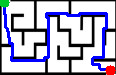

In [32]:
# solve = solve_maze_astar('../maze_images/tinysimple_maze2.jpg', 2, 2, 2,6)
solve = solve_maze_astar('../maze_images/downsize_simple_maze2.jpg', 4, 2, 110,70)
solve

rows 612
cols 612
found
drawing path


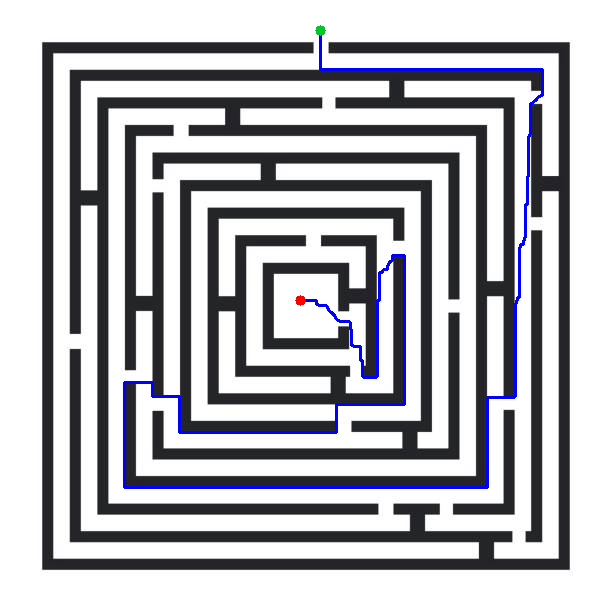

In [33]:
solve2 = solve_maze_astar('../maze_images/labirynth.jpg', 320, 30, 300, 300)
solve2

rows 1147
cols 1446
found
drawing path


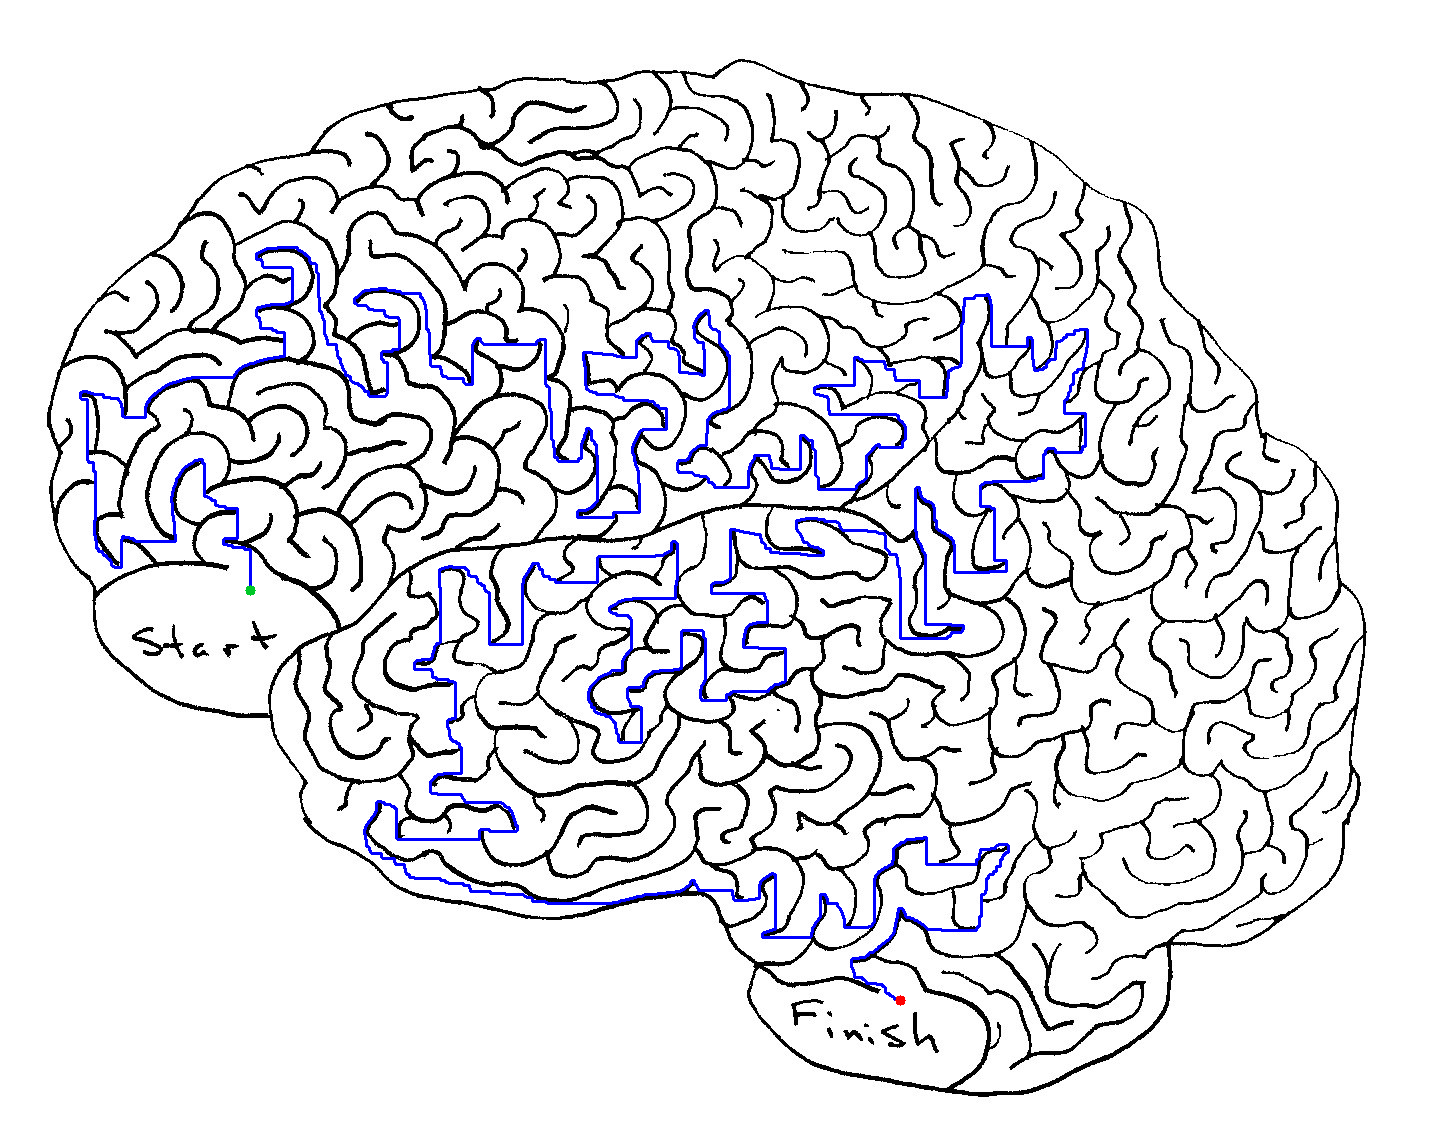

In [34]:
solve3 = solve_maze_astar('../maze_images/brain_maze.jpg', 250, 590, 900, 1000)
solve3

rows 1924
cols 2500
found
drawing path


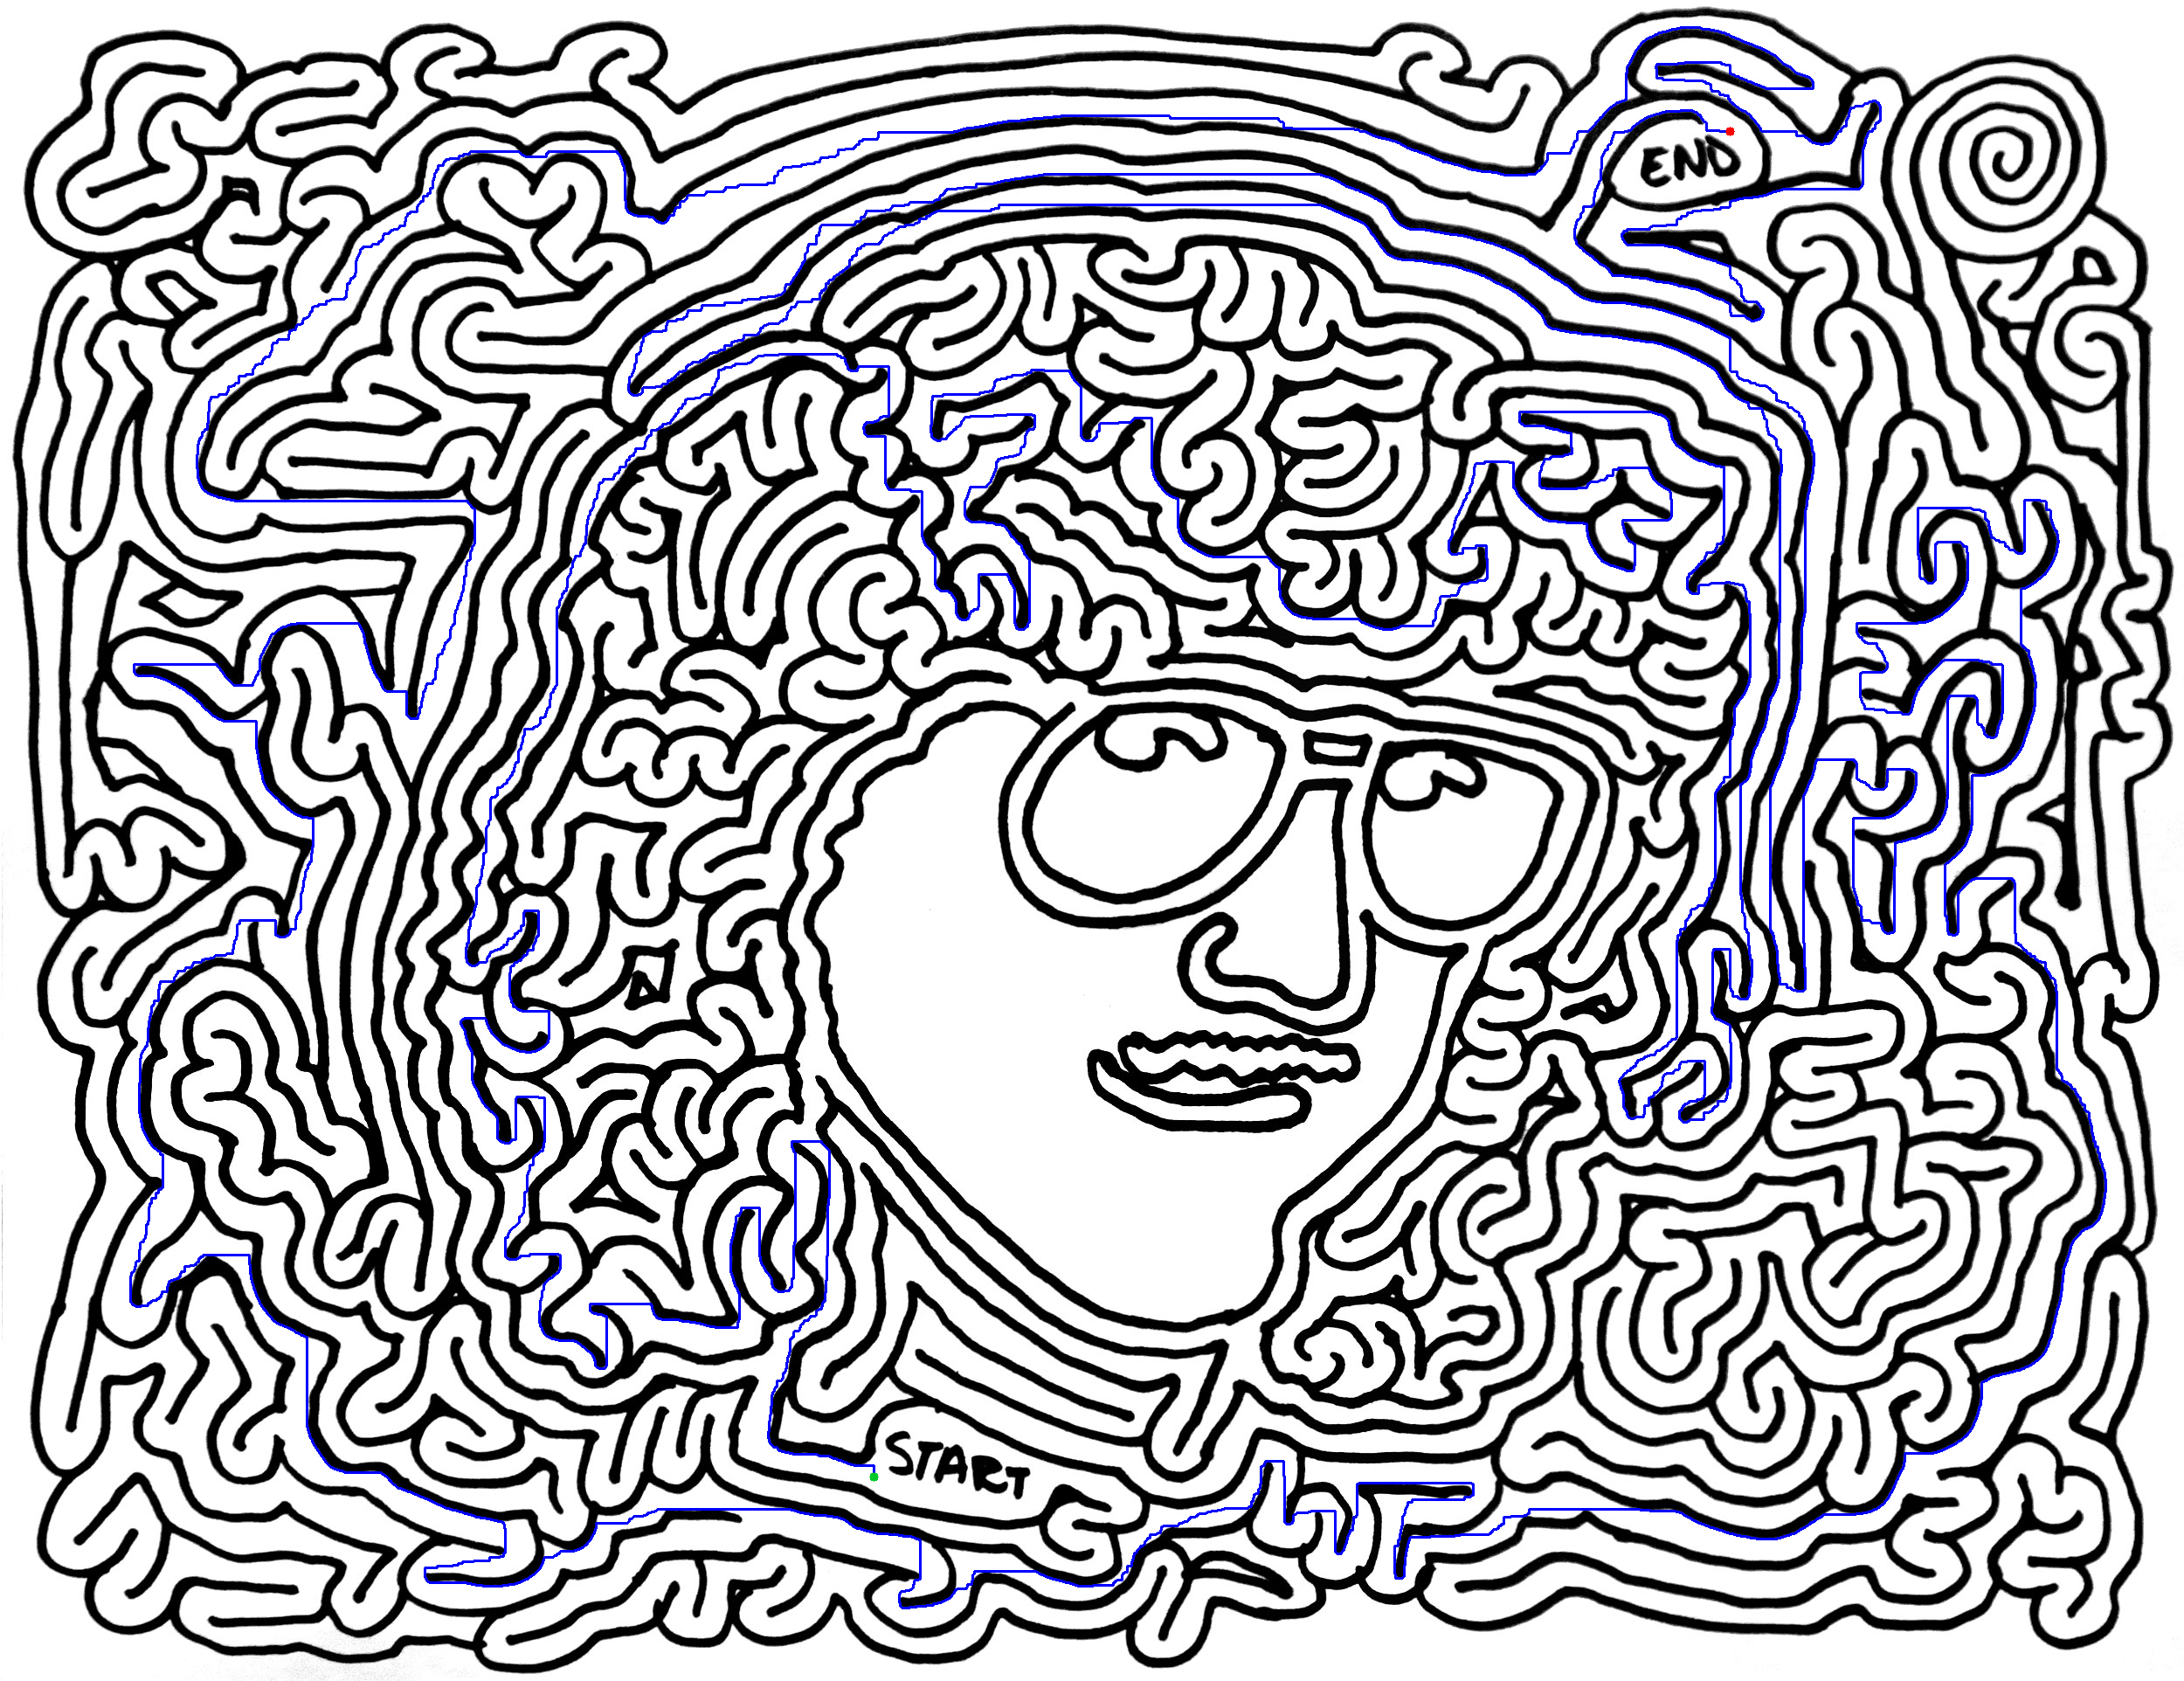

In [35]:
solve4 = solve_maze_astar('../maze_images/weird-al-yankovic.jpg', 1000, 1690, 1980, 150)
solve4